# Parte A

## Ejercicio 1

X = (x, dx, y, dy)

## Ejercicio 2

### a)

In [1]:
# import run_pyplane

$$
\dot{{\begin{bmatrix} x\\ dx\\ y \\ dy \end{bmatrix}}} = \begin{bmatrix} 0 & 1 & 0 & 0 \\ a & 0 & b & 0\\ 0 & 0 & 0 & 1\\ c & 0 & d & 0 \end{bmatrix} \begin{bmatrix} x\\ dx\\ y \\ dy\end{bmatrix}
$$

$a = b = c =d = 1$
<img src="figures/e2_fig1.png" />

$a = b =d = 1, c=-1$
<img src="figures/e2_fig2.png" />

$a= 1, d = 2, b=c=-1$
<img src="figures/e2_fig3.png" />

$a= 1, d = 1, b=-1, c=10$
<img src="figures/e2_fig4.png" />

### b)

$$
B = \begin{bmatrix} 0 & 0 \\ 1 & 0 \\ 0 & 0 \\ 0 & 1\end{bmatrix}
$$
$$
F(t, X) = \begin{bmatrix} 0 & 1 & 0 & 0 \\ a & 0 & b & 0\\ 0 & 0 & 0 & 1\\ c & 0 & d & 0 \end{bmatrix} \begin{bmatrix} x\\ dx\\ y \\ dy\end{bmatrix} + \begin{bmatrix} 0 & 0 \\ 1 & 0 \\ 0 & 0 \\ 0 & 1\end{bmatrix} \begin{bmatrix} u(t) \\ v(t) \end{bmatrix}
$$

# Parte B

## Ejercicio 3

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Graficas la solucion y el control

In [3]:
# Definimos el sistema asociado al problema de control optimo
def control_system(t, x, u, A, B):
    dx = A @ x + B @ u(x, t)
    return dx

In [4]:
def u1(x, t): # Constante
    return np.array([0.2, 0.1])

def u2(x, t): # Sinusoidales
    return np.array([np.sin(2*t), np.cos(t)])

def u3(x, t): # bang-bang
    if t < 1:
        return np.array([0, 0])
    elif 1< t < 2:
        return np.array([1, 0])
    elif 2 < t < 5:
        return np.array([0, 0])
    elif 5 < t < 7:
        return np.array([0, 1])
    elif 7 < t < 10:
        return np.array([0, 0])
    else:
        return np.array([0, 0])

def u4(x, t): # Feedbacks
    Z = np.array([
        [0, 1, -1, 1],
        [1, -1, 1, 0],
    ])
    return Z @ x

In [5]:
# Definimos los datos del problema
def datos(a, b, c, d):
    
    A = np.array([
        [0, 1, 0, 0], 
        [a, 0, b, 0],
        [0, 0, 0, 1],
        [c, 0, d, 0]
    ])
    B = np.array([
        [0, 0],
        [1, 0],
        [0, 0],
        [0, 1]
    ])
    
    return A, B

In [6]:
A1, B1 = datos(a=-1, b=-2, c=4, d=-5)
A2, B2 = datos(a=-1, b=0, c=4, d=-1)

In [7]:
def plot_sol(A, B, u):
    icv = np.array([0, 0, 1, 1])
    t_span = (0.0, 10.0)
    t = np.arange(t_span[0], t_span[1], 0.01)
    sol_ivp1 = solve_ivp(control_system, t_span, icv, args=[u, A, B], dense_output=True)
    z1 = sol_ivp1.sol(t)
    plt.plot(z1[0], z1[2])
    plt.scatter([icv[0]], [icv[2]], color="red");
    return sol_ivp1

Wall time: 29.9 ms


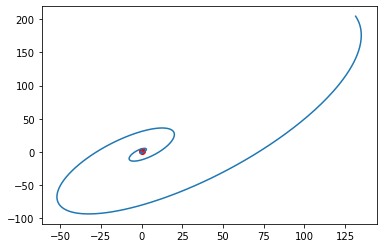

In [8]:
%%time
sol_ivp11 = plot_sol(A=A1, B=B1, u=u1); # Constante

Wall time: 30.9 ms


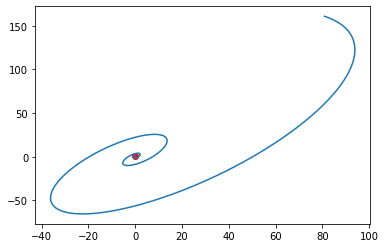

In [9]:
%%time
sol_ivp12 = plot_sol(A=A1, B=B1, u=u2) # Siusoidales

Wall time: 37.9 ms


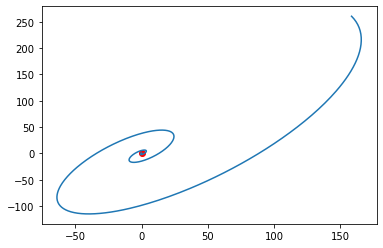

In [10]:
%%time
sol_ivp13 = plot_sol(A=A1, B=B1, u=u3) # Bang-bang

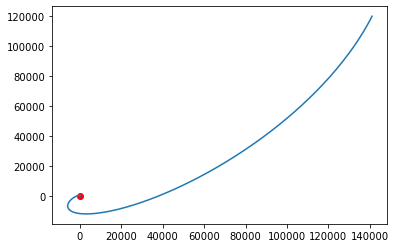

In [11]:
sol_ivp14 = plot_sol(A=A1, B=B1, u=u4) # Feedbacks

Wall time: 26 ms


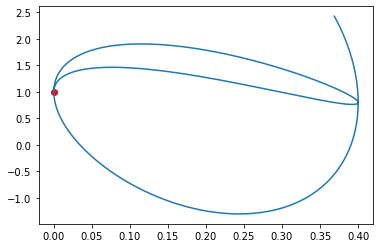

In [12]:
%%time
sol_ivp21 = plot_sol(A=A2, B=B2, u=u1); # Constante

Wall time: 31.9 ms


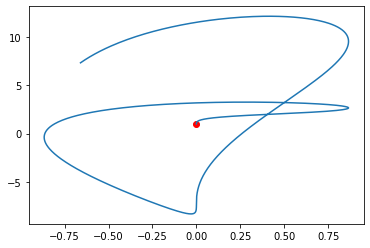

In [13]:
%%time
sol_ivp22 = plot_sol(A=A2, B=B2, u=u2) # Siusoidales

Wall time: 29.9 ms


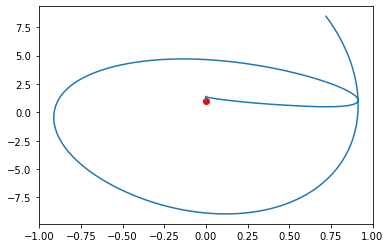

In [14]:
%%time
sol_ivp23 = plot_sol(A=A2, B=B2, u=u3) # Bang-bang

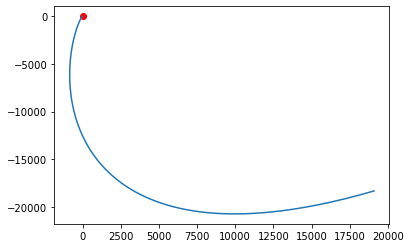

In [15]:
sol_ivp24 = plot_sol(A=A2, B=B2, u=u4) # Feedbacks

## Ejercicio 4

In [16]:
%%capture
!pip install control

In [17]:
import control

In [18]:
def kalman(A, B):
    n, m = B.shape

    C = np.zeros([n,n*m])

    C[:,:m]=B

    for i in range(m,n*m,m):
        C[:,i:i+m]=A@C[:,i-m:i]
    return C

In [19]:
%%time
C1 = kalman(A1, B1)
C1

Wall time: 0 ns


array([[ 0.,  0.,  1.,  0.,  0.,  0., -1., -2.],
       [ 1.,  0.,  0.,  0., -1., -2.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  4., -5.],
       [ 0.,  1.,  0.,  0.,  4., -5.,  0.,  0.]])

In [20]:
%%time
C_1 = control.ctrb(A1, B1)
C_1

Wall time: 0 ns


array([[ 0.,  0.,  1.,  0.,  0.,  0., -1., -2.],
       [ 1.,  0.,  0.,  0., -1., -2.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  4., -5.],
       [ 0.,  1.,  0.,  0.,  4., -5.,  0.,  0.]])

In [21]:
np.all(C1 == C_1)

True

El sistema si es controlable ya que la matriz $C$ es de rango completo.

In [22]:
np.linalg.matrix_rank(C1)

4

In [23]:
%%time
C2 = kalman(A2, B2)
C2

Wall time: 0 ns


array([[ 0.,  0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 1.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  4., -1.],
       [ 0.,  1.,  0.,  0.,  4., -1.,  0.,  0.]])

In [24]:
%%time
C_2 = control.ctrb(A2, B2)
C_2

Wall time: 0 ns


array([[ 0.,  0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 1.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  4., -1.],
       [ 0.,  1.,  0.,  0.,  4., -1.,  0.,  0.]])

In [25]:
np.all(C2 == C_2)

True

El sistema si es controlable ya que la matriz $C$ es de rango completo.

In [26]:
np.linalg.matrix_rank(C2)

4

## Ejercicio 5

In [27]:
C = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

In [28]:
def obsv(A, C):
    q, n = C.shape

    O = np.zeros([n*q, n])

    O[:q,:]=C

    for i in range(q,n*q,q):
        O[i:i+q,:]=O[i-q:i,:]@A
    return O

In [29]:
%%time
O1 = obsv(A1, C)
O1

Wall time: 0 ns


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-1.,  0., -2.,  0.],
       [ 4.,  0., -5.,  0.],
       [ 0., -1.,  0., -2.],
       [ 0.,  4.,  0., -5.]])

In [30]:
%%time
O_1 = control.obsv(A1, C)
O_1

Wall time: 0 ns


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-1.,  0., -2.,  0.],
       [ 4.,  0., -5.,  0.],
       [ 0., -1.,  0., -2.],
       [ 0.,  4.,  0., -5.]])

In [31]:
np.all(O1 == O_1)

True

El sistema si es observable ya que la matriz $O$ es de rango completo.

In [32]:
np.linalg.matrix_rank(O1)

4

In [33]:
%%time
O2 = obsv(A2, C)
O2

Wall time: 0 ns


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.],
       [ 4.,  0., -1.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  4.,  0., -1.]])

In [34]:
%%time
O_2 = control.obsv(A2, C)
O_2

Wall time: 1 ms


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.],
       [ 4.,  0., -1.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  4.,  0., -1.]])

In [35]:
np.all(O2 == O_2)

True

El sistema si es observable ya que la matriz $O$ es de rango completo.

In [36]:
np.linalg.matrix_rank(O2)

4

## Ejercicio 6

In [37]:
ss1 = control.StateSpace(
    A1, 
    B1, 
    C, 
    np.zeros(
        (C.shape[0], B1.shape[1])
    )
)
ss1

StateSpace(array([[ 0.,  1.,  0.,  0.],
       [-1.,  0., -2.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 4.,  0., -5.,  0.]]), array([[0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.]]), array([[1., 0., 0., 0.],
       [0., 0., 1., 0.]]), array([[0., 0.],
       [0., 0.]]))

In [38]:
ss2 = control.StateSpace(
    A2, 
    B2, 
    C, 
    np.zeros(
        (C.shape[0], B2.shape[1])
    )
)
ss2

StateSpace(array([[ 0.,  1.,  0.,  0.],
       [-1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 4.,  0., -1.,  0.]]), array([[0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.]]), array([[1., 0., 0., 0.],
       [0., 0., 1., 0.]]), array([[0., 0.],
       [0., 0.]]))

In [39]:
control.gram(ss1, "c")

ValueError: Oops, the system is unstable!

In [40]:
control.gram(ss2, "c")

ValueError: Oops, the system is unstable!

In [41]:
control.gram(ss1, "o")

ValueError: Oops, the system is unstable!

In [42]:
control.gram(ss2, "o")

ValueError: Oops, the system is unstable!

# Parte C

## Ejercicio 7

In [43]:
K1 = control.place(A1, B1, -np.array([1, 1/2, 1/3, 1/4]))
print("K:", K1)
print("eigvalues: A-BK", np.linalg.eig(A1-B1@K1)[0])

K: [[-0.72300847  1.17557587 -2.09253855 -0.25910822]
 [ 3.90746044 -0.25911092 -4.8186582   0.90775747]]
eigvalues: A-BK [-1.         -0.5        -0.33333333 -0.25      ]


In [44]:
K2 = control.place(A2, B2, -np.array([1, 1/2, 1/3, 1/4]))
print("K:", K2)
print("eigvalues: A-BK", np.linalg.eig(A2-B2@K2)[0])

K: [[-0.72300847  1.17557587 -0.09253855 -0.25910822]
 [ 3.90746044 -0.25911092 -0.8186582   0.90775747]]
eigvalues: A-BK [-1.         -0.5        -0.33333333 -0.25      ]


In [45]:
help(control.place)

Help on function place in module control.statefbk:

place(A, B, p)
    Place closed loop eigenvalues
    
    K = place(A, B, p)
    
    Parameters
    ----------
    A : 2D array_like
        Dynamics matrix
    B : 2D array_like
        Input matrix
    p : 1D array_like
        Desired eigenvalue locations
    
    Returns
    -------
    K : 2D array (or matrix)
        Gain such that A - B K has eigenvalues given in p
    
    Notes
    -----
    Algorithm
        This is a wrapper function for :func:`scipy.signal.place_poles`, which
        implements the Tits and Yang algorithm [1]_. It will handle SISO,
        MISO, and MIMO systems. If you want more control over the algorithm,
        use :func:`scipy.signal.place_poles` directly.
    
    Limitations
        The algorithm will not place poles at the same location more
        than rank(B) times.
    
    The return type for 2D arrays depends on the default class set for
    state space operations.  See :func:`~control.use_n

In [46]:
K_1 = control.lqr(A1, B1, np.eye(4), np.eye(2))
print("K:", K_1[0])
print("eigvalues: A-BK", np.linalg.eig(A1-B1@K_1[0])[0])

K: [[ 2.24340784  2.28940021 -3.01027767 -0.49544159]
 [ 1.26498527 -0.49544159  0.38324614  1.23330042]]
eigvalues: A-BK [-0.84485072+2.15812617j -0.84485072-2.15812617j -0.91649959+1.37703873j
 -0.91649959-1.37703873j]


In [47]:
K_2 = control.lqr(A2, B2, np.eye(4), np.eye(2))
print("K:", K_2[0])
print("eigvalues: A-BK", np.linalg.eig(A2-B2@K_2[0])[0])

K: [[ 2.83751278  2.53944595 -0.40326128  0.47564675]
 [ 2.19071958  0.47564675  0.35550003  1.21850738]]
eigvalues: A-BK [-0.79983234+1.6061606j  -0.79983234-1.6061606j  -1.07914433+0.47384847j
 -1.07914433-0.47384847j]


In [48]:
K_1

(array([[ 2.24340784,  2.28940021, -3.01027767, -0.49544159],
        [ 1.26498527, -0.49544159,  0.38324614,  1.23330042]]),
 array([[ 8.78049864,  2.24340784, -4.98001394,  1.26498527],
        [ 2.24340784,  2.28940021, -3.01027767, -0.49544159],
        [-4.98001394, -3.01027767,  7.13969328,  0.38324614],
        [ 1.26498527, -0.49544159,  0.38324614,  1.23330042]]),
 array([-0.84485072+2.15812617j, -0.84485072-2.15812617j,
        -0.91649959+1.37703873j, -0.91649959-1.37703873j]))

In [49]:
def U1_place(x, t):
    return - K1 @ x
def U2_place(x, t):
    return - K2 @ x
def U1_lqr(x, t):
    return - K_1[0] @ x
def U2_lqr(x, t):
    return - K_2[0] @ x

Wall time: 33 ms


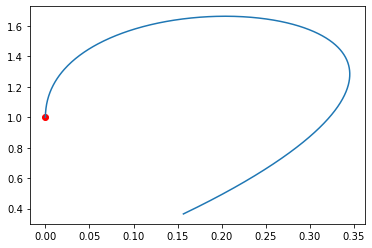

In [50]:
%%time
sol_ivp1place = plot_sol(A=A1, B=B1, u=U1_place)

Wall time: 30.9 ms


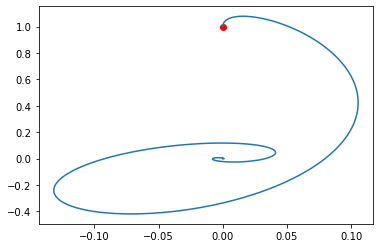

In [51]:
%%time
sol_ivp1lqr = plot_sol(A=A1, B=B1, u=U1_lqr)

Wall time: 24 ms


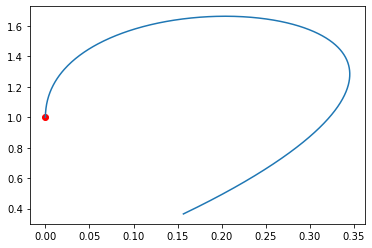

In [52]:
%%time
sol_ivp2place = plot_sol(A=A2, B=B2, u=U2_place)

Wall time: 29 ms


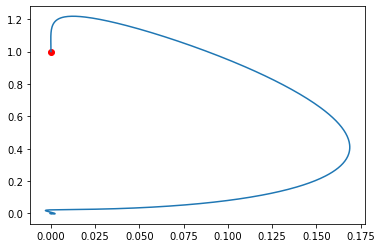

In [53]:
%%time
sol_ivp2lqr = plot_sol(A=A2, B=B2, u=U2_lqr)

## Ejercicio 8

$$
C = \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 0&  1 & 0\end{bmatrix}
$$
$$
Y = \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 0&  1 & 0\end{bmatrix} \begin{bmatrix} x \\ dx \\y  \\ dy\end{bmatrix} = C X
$$

In [54]:
L1place = control.place(A1.T, C.T, -np.array([1, 1/2, 1/3, 1/4]))
L1place = L1place.T
L1place

array([[ 1.17557587, -0.25911092],
       [-0.72300847, -2.09253956],
       [-0.25910822,  0.90775747],
       [ 3.90746145, -4.8186582 ]])

In [55]:
L2place = control.place(A2.T, C.T, -np.array([1, 1/2, 1/3, 1/4]))
L2place = L2place.T
L2place

array([[ 1.17557587, -0.25911092],
       [-0.72300847, -0.09253956],
       [-0.25910822,  0.90775747],
       [ 3.90746145, -0.8186582 ]])

In [56]:
L1lqr = control.lqr(A1.T, C.T, np.eye(4), np.eye(2))
L1lqr = L1lqr[0].T
L1lqr

array([[ 1.68182698,  0.71970487],
       [ 1.17325854, -0.86997907],
       [ 0.71970487,  1.84087365],
       [ 3.40528387,  1.45339544]])

In [57]:
L2lqr = control.lqr(A2.T, C.T, np.eye(4), np.eye(2))
L2lqr = L2lqr[0].T
L2lqr

array([[ 1.21850738,  0.47564675],
       [ 0.35550003, -0.40326128],
       [ 0.47564675,  2.53944595],
       [ 2.19071958,  2.83751278]])

In [58]:
def estimador(t, x, u, x_, A, B, C, L):
    dx = A @ x + B @ u(x, t) + L @ ( C @ x_.sol(t) - C @ x )
    return dx

In [62]:
estimador(t=0.1, x=np.ones(4), u=u1, x_=sol_ivp11, A=A1, B=B1, C=C, L=L1lqr)

array([-0.64364959, -4.04917347,  0.41120133, -4.22827029])

In [63]:
def plot_estimador(u, x_, A, B, C, L):
    icv = np.array([10, 0, 1, 1]) # condicion incial del estimador
    t_span = (0.0, 10.0)
    t = np.arange(t_span[0], t_span[1], 0.01)
    sol_ivp1 = solve_ivp(estimador, t_span, icv, args=[u, x_, A, B, C, L], dense_output=True)
    z1 = sol_ivp1.sol(t)
    z0 = x_.sol(t)
    plt.plot(z1[0], z1[2])
    plt.plot(z0[0], z0[2], color="orange")
    plt.scatter([icv[0]], [icv[2]], color="red");
    return sol_ivp1

Wall time: 38.9 ms


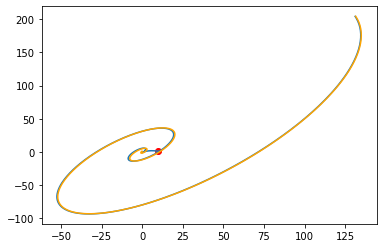

In [64]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u1, x_=sol_ivp11, C=C, L=L1place); # Constante

Wall time: 44.9 ms


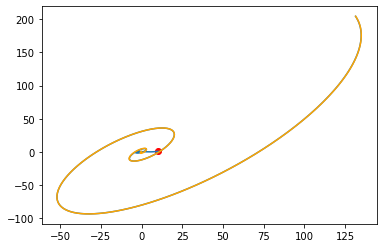

In [65]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u1, x_=sol_ivp11, C=C, L=L1lqr); # Constante

Wall time: 32 ms


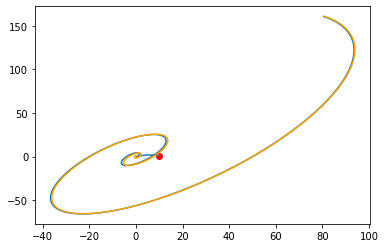

In [66]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u2, x_=sol_ivp12, C=C, L=L1place); # Sinusoidal

Wall time: 49.8 ms


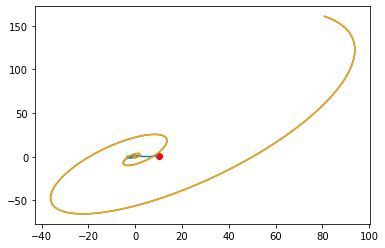

In [67]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u2, x_=sol_ivp12, C=C, L=L1lqr); # Sinusoidal

Wall time: 34.9 ms


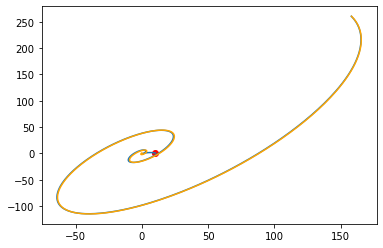

In [68]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u3, x_=sol_ivp13, C=C, L=L1place); # bang-bang

Wall time: 88.8 ms


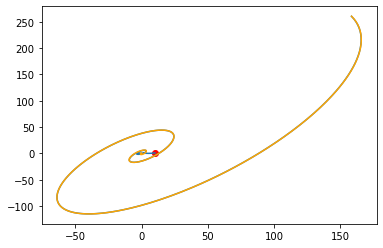

In [69]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u3, x_=sol_ivp13, C=C, L=L1lqr); # bang-bang

Wall time: 38.9 ms


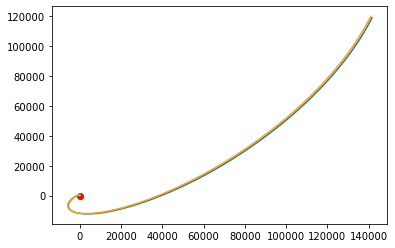

In [70]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u4, x_=sol_ivp14, C=C, L=L1place); # feedbacks

Wall time: 40.9 ms


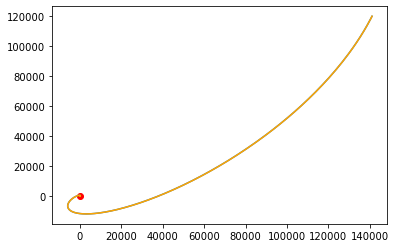

In [71]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u4, x_=sol_ivp14, C=C, L=L1lqr); # feedbacks

Wall time: 34.9 ms


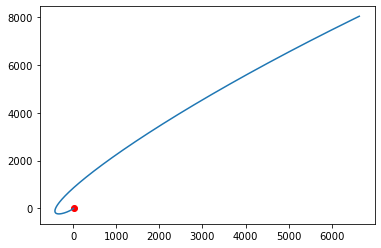

In [72]:
%%time
_ = plot_estimador(A=A1, B=B1, u=U1_place, x_=sol_ivp1place, C=C, L=L1place); # -K U place

Wall time: 35.9 ms


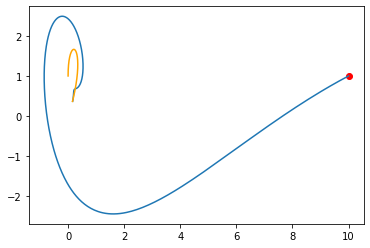

In [73]:
%%time
_ = plot_estimador(A=A1, B=B1, u=U1_place, x_=sol_ivp1place, C=C, L=L1lqr); # -K U place

Wall time: 32 ms


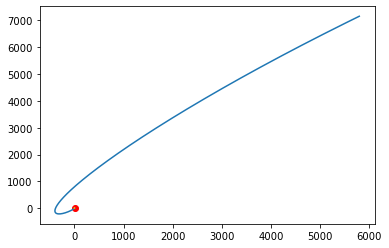

In [74]:
%%time
_ = plot_estimador(A=A1, B=B1, u=U1_place, x_=sol_ivp1lqr, C=C, L=L1place); # -K U lqr

Wall time: 37.9 ms


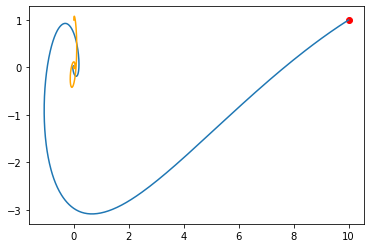

In [75]:
%%time
_ = plot_estimador(A=A1, B=B1, u=U1_place, x_=sol_ivp1lqr, C=C, L=L1lqr); # -K U lqr

Wall time: 37.9 ms


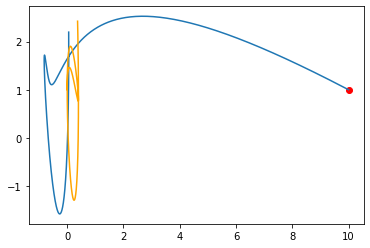

In [76]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u1, x_=sol_ivp21, C=C, L=L2place); # Constante

Wall time: 38.9 ms


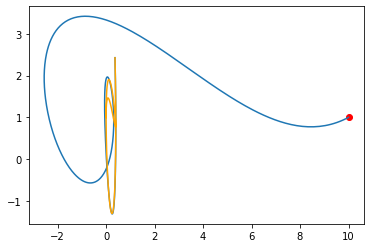

In [77]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u1, x_=sol_ivp21, C=C, L=L2lqr); # Constante

Wall time: 34.9 ms


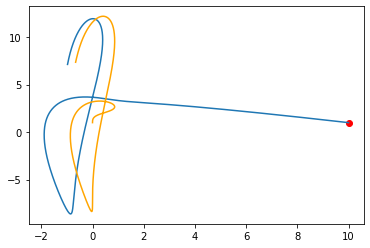

In [78]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u2, x_=sol_ivp22, C=C, L=L2place); # Sinusoidal

Wall time: 47.8 ms


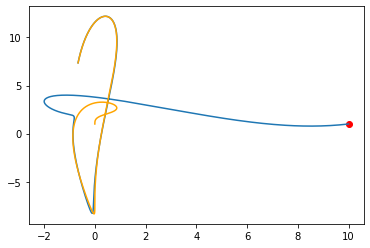

In [79]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u2, x_=sol_ivp22, C=C, L=L2lqr); # Sinusoidal

Wall time: 87.8 ms


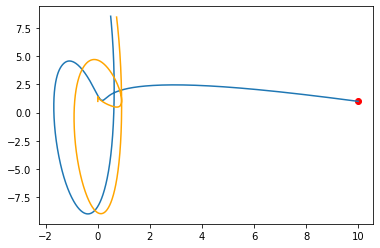

In [80]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u3, x_=sol_ivp23, C=C, L=L2place); # bang-bang

Wall time: 42.9 ms


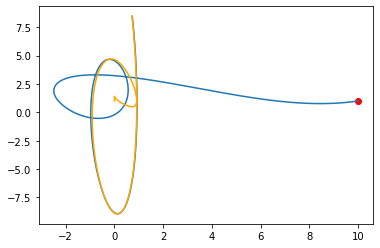

In [81]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u3, x_=sol_ivp23, C=C, L=L2lqr); # bang-bang

Wall time: 36.9 ms


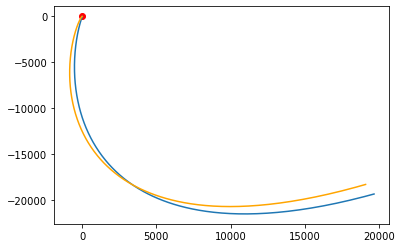

In [82]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u4, x_=sol_ivp24, C=C, L=L2place); # feedbacks

Wall time: 40.1 ms


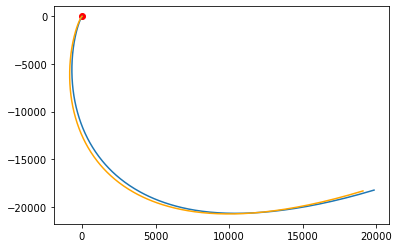

In [84]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u4, x_=sol_ivp24, C=C, L=L2lqr); # feedbacks

Wall time: 35.9 ms


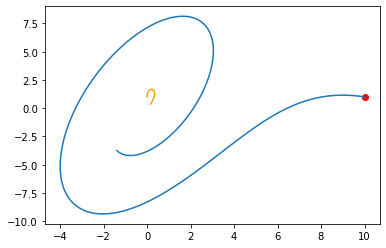

In [85]:
%%time
_ = plot_estimador(A=A2, B=B2, u=U2_place, x_=sol_ivp2place, C=C, L=L2place); # - K U place

Wall time: 32.9 ms


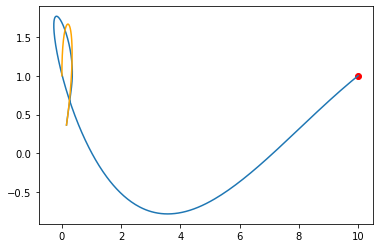

In [86]:
%%time
_ = plot_estimador(A=A2, B=B2, u=U2_place, x_=sol_ivp2place, C=C, L=L2lqr); # - K U place

Wall time: 40.9 ms


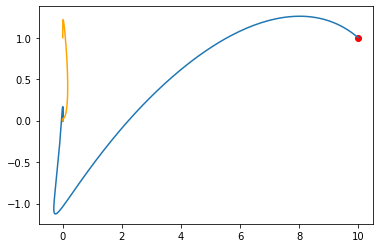

In [87]:
%%time
_ = plot_estimador(A=A2, B=B2, u=U2_lqr, x_=sol_ivp2lqr, C=C, L=L2place); # - K U lqr

Wall time: 40.9 ms


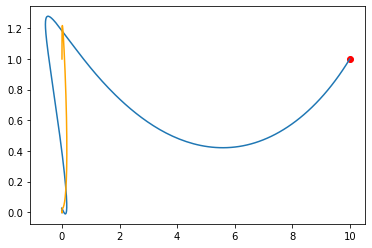

In [88]:
%%time
_ = plot_estimador(A=A2, B=B2, u=U2_lqr, x_=sol_ivp2lqr, C=C, L=L2lqr); # - K U lqr

## Ejercicio 9

|A-Bk |   LC- BK   |
----------------
|    0    | A-LC |
-------------

determinar K y L con LQR para (A1, B1) y (A2, B2). Simular con A_tilda (matrix por bloques)

In [89]:
K1lqr = K_1[0]
AA1 = np.block([[A1 - B1 @ K1lqr, L1lqr @ C - B1 @ K1lqr], [np.zeros(A1.shape), A1 - L1lqr @ C]])
AA1.shape

(8, 8)

In [90]:
K2lqr = K_2[0]
AA2 = np.block([[A2 - B2 @ K2lqr, L2lqr @ C - B2 @ K2lqr], [np.zeros(A2.shape), A2 - L2lqr @ C]])
AA2.shape

(8, 8)

In [91]:
def error(t, x, AA):
    dx = AA @ x
    return dx

In [92]:
def plot_error(AA):
    icv = np.array([1, 0, 1, 1, 1, 0, 1, 0]) # condicion incial de [x, ex]
    t_span = (0.0, 10.0)
    t = np.arange(t_span[0], t_span[1], 0.01)
    sol_ivp1 = solve_ivp(error, t_span, icv, args=[AA], dense_output=True)
    z1 = sol_ivp1.sol(t)
    plt.plot(z1[4], z1[6])
    plt.scatter([icv[4]], [icv[6]], color="red");
    return sol_ivp1

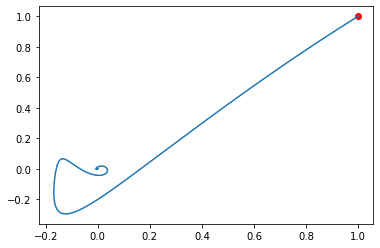

In [93]:
_ = plot_error(AA1)

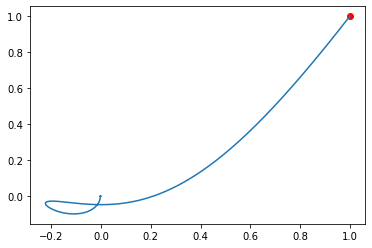

In [95]:
_ = plot_error(AA2)

los de arriba son plots del error!